<a href="https://colab.research.google.com/github/Aqeedathussain/USHousePricePredictor/blob/main/Price_of_House_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel('/content/Lab-9.xlsx')
x=df.iloc[:, :-1].values
y=df.iloc[:, -1].values
df.drop('S. No.:', axis=1, inplace=True)
df

,Size (sq. ft),Bedrooms,Age (years),Price (Rs.)
0,1500,3,5,250000
1,1800,4,2,320000
2,1200,2,10,180000
3,2200,4,3,400000
4,1700,3,6,275000
5,2000,4,4,350000
6,900,2,15,140000
7,2500,5,1,450000
8,1350,3,8,210000
9,1950,3,3,330000


Splitting data into train and tetst set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)


Training the Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

Predicting the vlaues

In [ ]:
y_pred=regressor.predict(x_test)
print(y_pred)

[140000. 275000.]


Visualizing the Decision Tree regression model

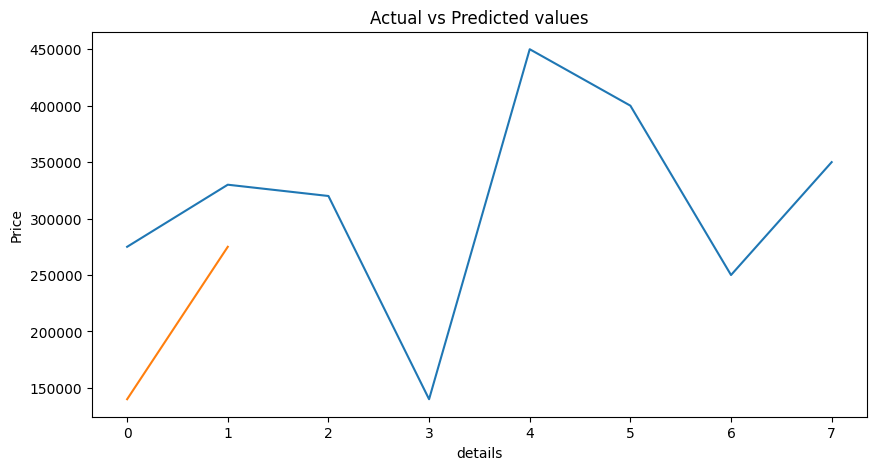

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_train)
plt.plot(y_pred)
plt.title('Actual vs Predicted values')
plt.xlabel('details')
plt.ylabel('Price')
plt.show()

Evaluating the model

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse=mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
print('Mean Squared Error is:', mse)
print('Root Mean Square Error is:', rmse)
print('Mean Absolute Error is:', mae)

Mean Squared Error is: 2912500000.0
Root Mean Square Error is: 53967.58286230726
Mean Absolute Error is: 52500.0


Training the Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rs=RandomForestRegressor(n_estimators=100, random_state=0)
rs.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

Making Predictions


In [ ]:
prediction=rs.predict(x_test)
print(prediction)

[206000. 254400.]


Plotting the model

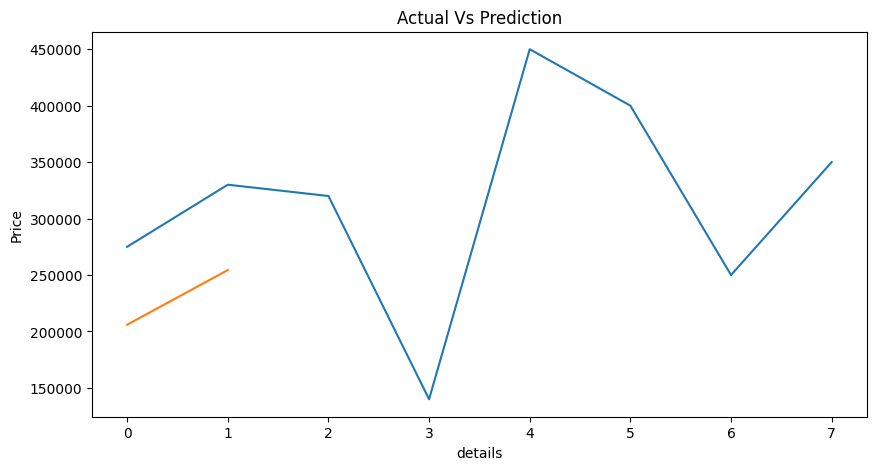

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_train)
plt.plot(prediction)
plt.title('Actual Vs Prediction')
plt.xlabel('details')
plt.ylabel('Price')
plt.show()

Evaluating the model

In [ ]:
mse=mean_squared_error(y_test, prediction)
rmse=math.sqrt(mse)
mae=mean_absolute_error(y_test, prediction)
print('Mean Squared Error is:', mse)
print('Root Mean Square Error is:', rmse)
print('Mean Absolute Error is:', mae)

Mean Squared Error is: 1323680000.0
Root Mean Square Error is: 36382.413333917255
Mean Absolute Error is: 35200.0


Durbin watson

In [ ]:
from statsmodels.stats.stattools import durbin_watson
residuals=y_test-prediction
dw=durbin_watson(residuals)
print('Durbin Watson for Random Forest is:', dw)
residual=y_test-y_pred
dwt=durbin_watson(residual)
print('Durbin Watson for Decision Tree is:', dwt)


Durbin Watson for Random Forest is: 0.1278858938716306
Durbin Watson for Decision Tree is: 1.8927038626609443


# Conclusion:
In pure prediction accuracy Random Forest is slightly better.
In model stability and residual behavior Decision Tree is better.